# Credit Card Fraud Detection


- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. (PCA-->  Principal Component Analysis)

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

-  Feature 'Class' is the response variable and it takes value:

- 1 in case of FRAUD and 0 otherwise.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [206]:
df=pd.read_csv(CreditCard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [208]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data Visualization:

In [209]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x258eb21f790>,
 [Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')])

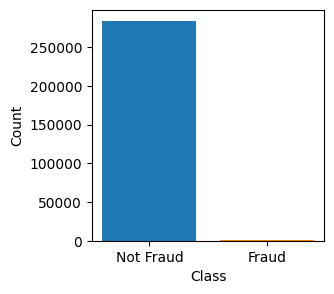

In [211]:
plt.figure(figsize=(3,3))
plt.bar([0],height=len(df[df["Class"]==0]))
plt.bar([1],height=len(df[df["Class"]==1]))


plt.xlabel("Class")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not Fraud', 'Fraud'))   # to label the bars

> Fraud transactions are very less as compared to genuine transactions !!

## There are no categorical columns as such, so no need of encoding !

<Axes: xlabel='Class', ylabel='Time'>

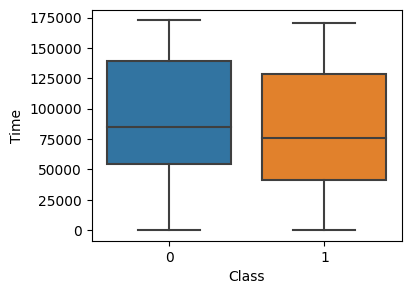

In [212]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Class'],y=df['Time'])

## Transaction times for fraud transactions :

C:\Users\Vidul\AppData\Local\Temp\ipykernel_21224\133461796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class']==1]['Time'])


<Axes: xlabel='Time', ylabel='Density'>

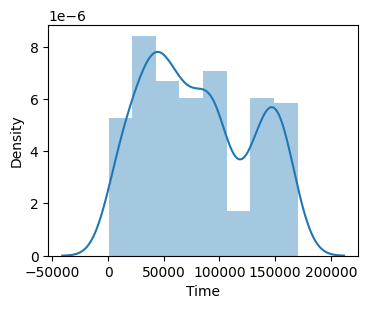

In [213]:
plt.figure(figsize=(4,3))
sns.distplot(df[df['Class']==1]['Time'])

## Checking Correlation using heatmap:

In [214]:
plt.figure(figsize=(140,90))
sns.heatmap(df.corr(),annot=True,annot_kws={"fontsize": 45},fmt=".2f")  #annot_kws is for increasing font sizeof values

plt.xticks(fontsize=55)
plt.yticks(fontsize=55)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0, 0.5, 'Time'),
  Text(0, 1.5, 'V1'),
  Text(0, 2.5, 'V2'),
  Text(0, 3.5, 'V3'),
  Text(0, 4.5, 'V4'),
  Text(0, 5.5, 'V5'),
  Text(0, 6.5, 'V6'),
  Text(0, 7.5, 'V7'),
  Text(0, 8.5, 'V8'),
  Text(0, 9.5, 'V9'),
  Text(0, 10.5, 'V10'),
  Text(0, 11.5, 'V11'),
  Text(0, 12.5, 'V12'),
  Text(0, 13.5, 'V13'),
  Text(0, 14.5, 'V14'),
  Text(0, 15.5, 'V15'),
  Text(0, 16.5, 'V16'),
  Text(0, 17.5, 'V17'),
  Text(0, 18.5, 'V18'),
  Text(0, 19.5, 'V19'),
  Text(0, 20.5, 'V20'),
  Text(0, 21.5, 'V21'),
  Text(0, 22.5, 'V22'),
  Text(0, 23.5, 'V23'),
  Text(0, 24.5, 'V24'),
  Text(0, 25.5, 'V25'),
  Text(0, 26.5, 'V26'),
  Text(0, 27.5, 'V27'),
  Text(0, 28.5, 'V28'),
  Text(0, 29.5, 'Amount'),
  Text(0, 30.5, 'Class')])

> As we can see in the heatmap, there are no such correlated features in the dataset !!

## Checking Outliers:

In [215]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Text(0.5, 1.0, 'Box Plot of V1-V28')

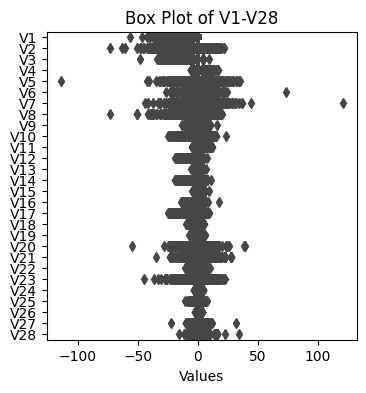

In [216]:
l=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(4,4))
sns.boxplot(data=df[l], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of V1-V28')

Text(0.5, 1.0, 'Box Plot of Amount')

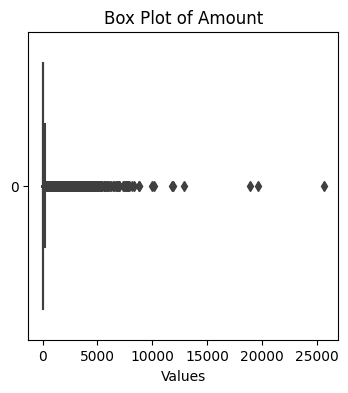

In [217]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df['Amount'], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of Amount')

> As we can see there are so many outliers in 'V1-V28' as well as in 'Amount' columns

## Finding Quantiles and removing outliers:

In [218]:
l=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']

for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of V1-V28')

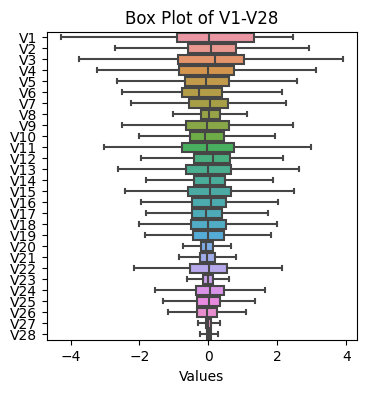

In [219]:
l=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(4,4))
sns.boxplot(data=df[l], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of V1-V28')

## Splitting:

In [220]:
x=df.drop("Class", axis=1)
y=df['Class']

In [221]:
x.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [222]:
print(list(x.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [223]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

> Features are already scaled !!

## Train_Test_split:

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [185]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


## MODEL TRAINING:

## 1) Logistic Regression (Binary Classification)

In [186]:
model1=LogisticRegression(max_iter=1000) # Increase the max_iter value
model1

LogisticRegression(max_iter=1000)

In [187]:
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.85      0.75      0.80       112

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

[[56835    15]
 [   28    84]]


## 2) Random Forest Classifier

In [188]:
model2=RandomForestClassifier()
model2

RandomForestClassifier()

In [189]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.93      0.76      0.84       112

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56844     6]
 [   27    85]]


## 3) KNN Classifier

In [193]:
model3=KNeighborsClassifier(n_neighbors=5) 
model3

KNeighborsClassifier()

In [194]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.86      0.05      0.10       112

    accuracy                           1.00     56962
   macro avg       0.93      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

[[56849     1]
 [  106     6]]


## Accuracy Score

In [195]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1)*100)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred3)*100)

Logistic Regression Accuracy: 99.92451107756047
Random Forest Accuracy: 99.9420666409185
KNN Classifier Accuracy: 99.8121554720691


## Building predictive model

In [228]:
# Enter :
# ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 
# 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Output : 'Fraud Transaction', 'Genuine Transaction'

input=[[0.000000, -1.359807, -0.072781, 2.536347, 1.378155, -0.338321, 0.462388, 0.239599, 0.098698, 0.363787, 0.090794,
        -0.551600, -0.617801, -0.991390, -0.311169, 1.468177, -0.470401, 0.207971, 0.025791, 0.403993, 0.251412,
        -0.018307, 0.277838, -0.110474, 0.066928, 0.128539, -0.189115, 0.133558, -0.021053, 149.620000],
       [406.000000, -2.312227, 1.951992, -1.609851, 3.131313, -0.522188, -1.426545, -2.240844, 1.131309, -2.503452, -2.019449, 
        2.992725, -1.941286, -0.595222, -1.803660, 0.389724, -1.140747, -1.808883, -0.016822, 0.416956, 0.126911, 0.517232, -0.035049, 
        -0.465211, 0.320198, 0.044519, 0.177840, 0.261145, -0.143276, 0.000000]]
for i in input:
    x=model2.predict([i])
    if(x==0):
        print("It is a genuine transaction !")
    elif(x==1):
        print("It is a fraud transaction")


C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


It is a genuine transaction !
It is a fraud transaction
